# CLASIFICADOR DE IMAGENES

# DATOS

In [1]:
import pandas as pd
import os
import numpy as np
import zipfile
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
train1 = r"../data/raw/train.zip"
test1 = r"../data/raw/test1.zip"
target_folder= r"../data/interim"

def extraer_archivos(nombre_archivo_zip, directorio_destino):
     with zipfile.ZipFile(nombre_archivo_zip, 'r') as archivo_zip:
         archivo_zip.extractall(directorio_destino)

extraer_archivos(train1, target_folder)
extraer_archivos(test1, target_folder)

# VISUALIZACIÓN DE IMAGENES

In [3]:
# Ruta de la carpeta donde están las imágenes
image_folder = '../data/interim/train'

# Inicializar las listas para las imágenes de gatos y perros
cat = []
dog = []

# Obtener la lista de archivos en la carpeta y asignar a las listas correspondientes
for f in os.listdir(image_folder):
    if 'cat' in f.lower():  # Si el nombre contiene 'cat', lo agregamos a la lista de gatos
        cat.append(f)
    elif 'dog' in f.lower():  # Si el nombre contiene 'dog', lo agregamos a la lista de perros
        dog.append(f)

# Mostrar las imágenes (opcional)
print(f"Imágenes de gatos: {cat[:9]}")
print(f"Imágenes de perros: {dog[:9]}")




Imágenes de gatos: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg']
Imágenes de perros: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg']


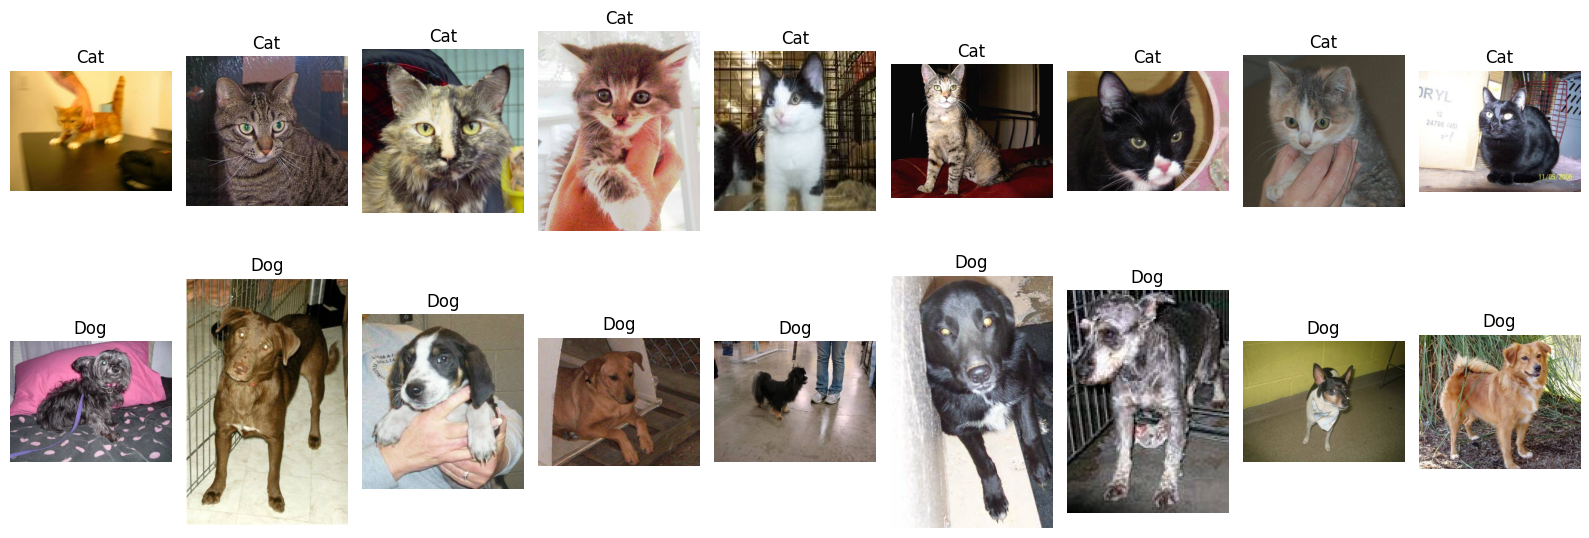

In [4]:
# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(2, 9, figsize=(16, 6))

# Mostrar imágenes de gatos
for ax, image_file in zip(axes[0], cat):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')  
    ax.set_title('Cat')  

# Mostrar imágenes de perros
for ax, image_file in zip(axes[1], dog):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('Dog')

# Ajustar el espacio entre las imágenes
plt.tight_layout()
plt.show()

Normalización de las imagenes: tamaño fijo de 200x200 píxeles.

In [5]:
# Carpetas de entrada y salida
input_dir = "../data/interim/train"
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)

# Procesar imágenes
image_size = (200, 200)
categories = ['cat', 'dog']

# Crear carpetas de salida para cada categoría
for category in categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Redimensionar y mover las imágenes
for filename in os.listdir(input_dir):
    category = 'cat' if 'cat' in filename else 'dog'
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    if img is not None:
        img_resized = cv2.resize(img, image_size)
        save_path = os.path.join(output_dir, category, filename)
        cv2.imwrite(save_path, img_resized)

print("Todas las imágenes han sido redimensionadas y clasificadas.")

Todas las imágenes han sido redimensionadas y clasificadas.


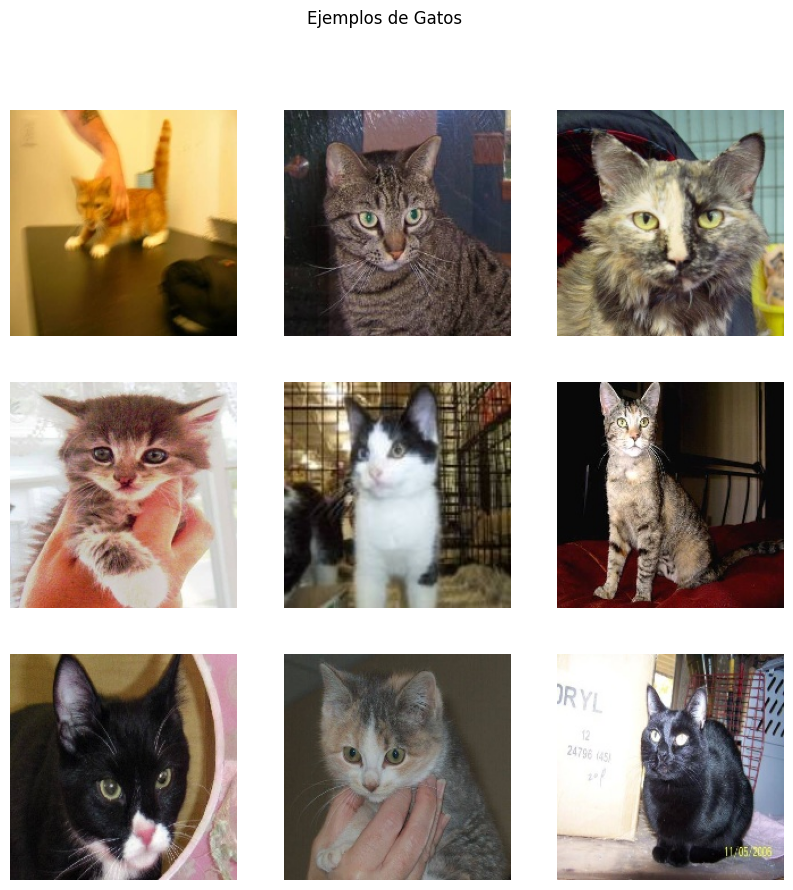

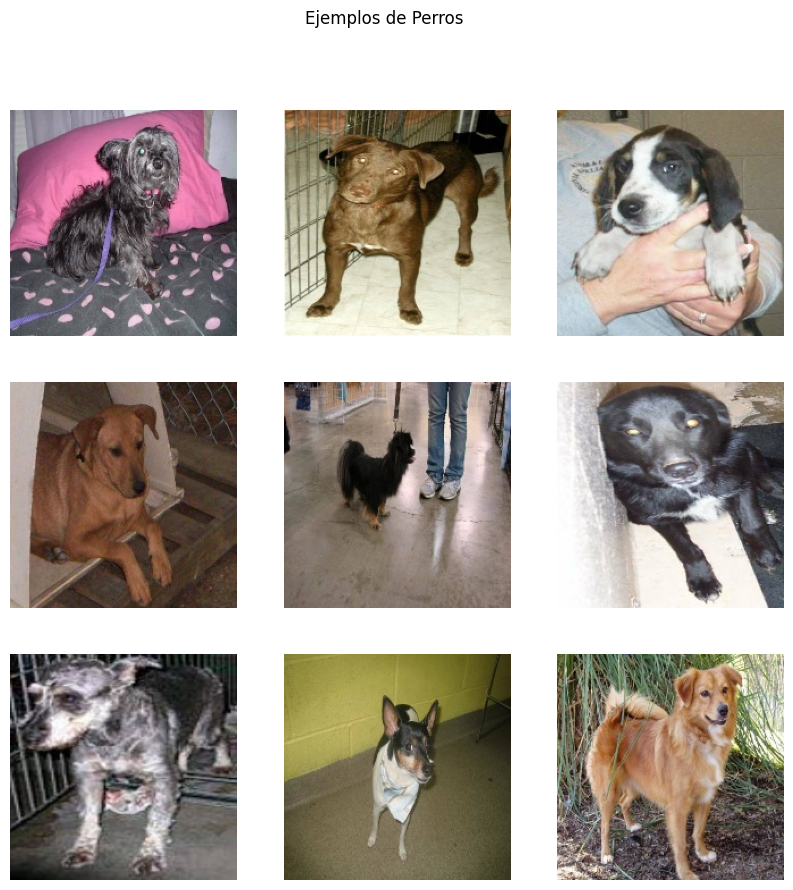

In [6]:
cat_images = [os.path.join(output_dir, "cat", img) for img in os.listdir(os.path.join(output_dir, "cat"))[:9]]
dog_images = [os.path.join(output_dir, "dog", img) for img in os.listdir(os.path.join(output_dir, "dog"))[:9]]

def plot_images(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        plt.subplot(3, 3, i + 1)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_images(cat_images, "Ejemplos de Gatos")
plot_images(dog_images, "Ejemplos de Perros")

# CNN. RED NEURONAL

In [7]:
# Definir algunas reglas para DataGen
train_dir = "../data/processed"
image_size = (200, 200)

dataimg = ImageDataGenerator(validation_split=0.2)

# Generación de datos de entrenamiento

train_generator = dataimg.flow_from_directory(
    train_dir, target_size=(200, 200), batch_size=32, class_mode='categorical', subset='training')

# Generación de datos de prueba
test_generator = dataimg.flow_from_directory(
    train_dir, target_size=(200, 200), batch_size=32, class_mode='categorical', subset='validation')



NameError: name 'ImageDataGenerator' is not defined

In [8]:
# Crear el modelo
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [9]:
# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

NameError: name 'model' is not defined

In [10]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

NameError: name 'model' is not defined

In [11]:
loss, accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de validación: {accuracy * 100:.2f}%")

NameError: name 'model' is not defined